# La maldición de las 3 sigmas

A ver si vemos qué quieren decir las 2.7 sigmas que hemos conseguido.

Como de costumbre, empecemos cargando las librerías necesarias

In [2]:
import numpy as np
from SimularBackground import *
%matplotlib inline

Me he creado una función que simula 10000 obsevaciones para las cuales no hay señal. El número esperado de eventos para las observaciones ON y OFF son los mismos. Eso no quiere decir que siempre tengamos el mismo número de eventos para ON y OFF. Es como cuando tiras dos dados, el valor promedio esperado de la suma de los dos dados es 7, pero eso no quiere decir que a veces no sumen 2 o 12.

Para cada una de estas observaciones simuladas (¡que tardaría una vida entera dedicada sólo a ellas para hacerlas de verdad!), me calculo la ** Significancia ** que se da en unidades de **sigmas **.

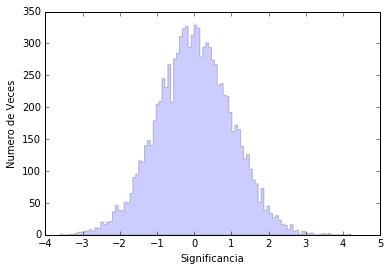

In [2]:
grafica("Significancias")

La parte negativa de la distribución es para los casos en que hay más eventos en las observaciones OFF que en las ON, lo cual no tiene mucho sentido físico. Simplemente pasa por lo que llamamos fluctuaciones estadísticas. La parte positiva de la distribución en este caso también son fluctuacions estadísiticas por construcción. Pero en observaciones reales como la que estamos analizando de Cyg-X1 no se puede distinguir entre una fluctuación estadística o señal de verdad.

Eso si, como más ** sigmas ** tiene nuesta ** significancia ** menos probable es que sea una fluctuación estadística. Se puede ver en el gráfico que la cantidad de veces que tengo un cierto valor de ** sigmas ** decrece cuando crece ** sigma **.

De hecho vamos a calcular cuál es la probabilidad de tener una fluctuación estadística que me dé una significancia mayor que la que tenemos con los datos de Cyg-X1.

La probabilidad de que el ruido no genere una significancia de 2.68 o mayor es: 0.22 %


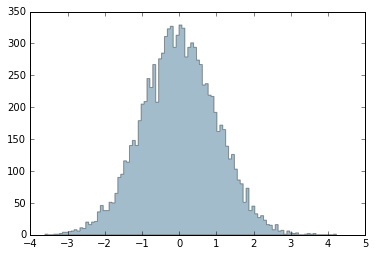

In [3]:
# Primero recupero del gráfico las "Veces" que tengo cada "Significacancia"
# Lo hago con un par de funciones que me he creado
Veces=valores("Numero de Veces")
Significancias=valores("Significancias")

# Ahora uso una función de la librería que he cargado numpy que para cada bin me suma
# los valores de todos los bins anteriores. Por ejemplo paso de (3,6,0,4,1) a (3,9,9,13,14)
VecesAcumuladas = np.cumsum(Veces)
# Y con esto es fácil calcular la fracción de veces que tengo una significancia mayor
# que cualquier valor. Primero calculo la probabilidad para cada unos de los valores
# de sigma en el gráfico
Probabilidad = 1.0-VecesAcumuladas/(VecesAcumuladas.max())
# Y finalmente uso un bucle (for x in range(0.100)) para el cual x va cambiando de 
# valor desde 0 hasta 100 y miro cuando el valor de la significancia es mayor que 2.68
# y allí tendré mi probabilidad:
for x in range(0,100):
        if Significancias[x] > 2.68 :
                print ("La probabilidad de que el ruido no genere una significancia de 2.68 o mayor es:", Probabilidad[x]*100, "%")
                break

Estamos de acuerdo, una probabilidad del 0.22% es bastante pequeña. Pero no lo suficiente. Los científicos nos queremos asegurar que lo que estamos viendo es cierto. Para estar seguros que no son fluctuaciones estadísticas el campo científico normalmente requiere que la ** Significancia ** sea de ** 5 sigmas **. Eso es una probabilidad de 0.000025 %

> Nota: Definir funciones nos ayuda a ir paso a paso, pero si téneis curiosidad por saber qué está definido en las funciones, no dudés en usar el foro para preguntar.